In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
poke=pd.read_csv('pokemon.csv')

In [3]:
poke.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [17]:
#poke.info() #Проверяем, где есть пустые строчки. Таких покемонов удалим. Например, много NaN в  type2. Удалим покемонов, про которых нам хотя бы что-то неизвестно!
#poke.dropna()

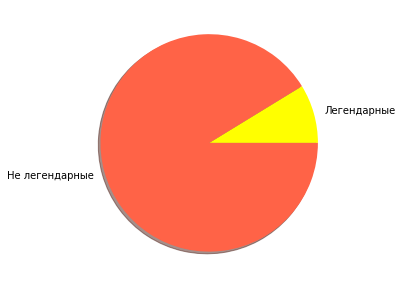

In [5]:
#Посмотрим на соотношение легендарных покемонов

poke_leg = poke[poke['is_legendary']==True].count()
poke_nleg = poke[poke['is_legendary']==False].count()

fig = plt.figure(figsize=(5,5))

colours = ['yellow', 'tomato']
pokeLeg = poke[poke['is_legendary']==True]
pokeNLeg = poke[poke['is_legendary']==False]

legDist = [pokeLeg['name'].count(),pokeNLeg['name'].count()]
legPie = plt.pie(legDist, labels= ['Легендарные', 'Не легендарные'], shadow=True, colors=colours)

In [6]:
#list(poke) Посмотрим названия столбцов, чтобы найти названия базовых признаков. 

In [16]:

print ("Чем ярче цвет оттенков красного - тем больше корреляция, чем ярче цвет оттенков синего - тем меньше корреляция")
poke_cor=poke[['base_egg_steps','base_happiness', 'base_total', 'weight_kg', 'height_m']] #Создаём таблицу с нужными для корреляции колонками. 
poke_cor.corr().style.background_gradient(cmap='coolwarm') #Делаем таблицу корреляции и обозначаем цветами ячейки, чтобы визуально оценить, где корреляция наиболее сильная.



Чем ярче цвет оттенков красного - тем больше корреляция, чем ярче цвет оттенков синего - тем меньше корреляция


,base_egg_steps,base_happiness,base_total,weight_kg,height_m
base_egg_steps,1,-0.524551,0.496466,0.443286,0.381455
base_happiness,-0.524551,1,-0.274795,-0.40584,-0.343394
base_total,0.496466,-0.274795,1,0.458111,0.535063
weight_kg,0.443286,-0.40584,0.458111,1,0.626551
height_m,0.381455,-0.343394,0.535063,0.626551,1


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


X = poke.drop(columns=["is_legendary"]) #Начинаем обучать машину. Х - набор всех признаков, кроме легендарности, которую нам надо выявить. 
y = poke["is_legendary"] #Легендарность - предсказываемый признак

#Подключаем тренировку и проверку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

integer_values = X.select_dtypes(include=['integer']).columns.to_list() #Исключаем нестандартные столбцы
    
Gau = GaussianNB() #Запускаем классификатор и тренируем его
mod = Gau.fit(X_train[integer_values], y_train)

pred = Gau.predict(X_test[integer_values]) #Предсказываем


print(accuracy_score(y_test, pred)) #Точность


0.9750623441396509
